In [1]:
import pickle
with open('/kaggle/input/takeo-data/New_I.pkl', 'rb') as f:
    X = pickle.load(f)

with open('/kaggle/input/takeo-data/New_Y.pkl', 'rb') as f:
    Y = pickle.load(f)


In [2]:
import numpy as np
Y = Y.astype(np.float32)

In [3]:
import cv2
import numpy as np
from tensorflow.keras.applications.inception_v3 import preprocess_input 
from tensorflow.image import resize

# Supondo que X seja uma lista de imagens coloridas.
X_resized = np.array([resize(image, [100, 100]) for image in X])
imagens_cinza = np.array([cv2.cvtColor(image.astype('uint8'), cv2.COLOR_BGR2GRAY) for image in X_resized])

def converter_para_rgb(imagens_cinza):
    imagens_rgb = np.stack((imagens_cinza,) * 3, axis=-1)
    return imagens_rgb

imagens_rgba = converter_para_rgb(imagens_cinza)


imagens_rgba[0].shape
#X = preprocess_input(imagens_rgba)
X = imagens_rgba
X.shape


# Convertendo a lista em um array NumPy
X = np.array(X)

2024-07-19 15:58:12.751911: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-19 15:58:12.752031: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-19 15:58:12.877730: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
print(np.min(X))
print(np.max(X))
X.shape

0
255


(10022, 100, 100, 3)

In [5]:
X = preprocess_input(X)

In [6]:
print(np.min(X))
print(np.max(X))
X.shape

-1.0
1.0


(10022, 100, 100, 3)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [8]:
import numpy as np

unique, counts = np.unique(Y_train, return_counts=True)
ocorrencias = dict(zip(unique, counts))
print("Distribuição no conjunto de treino")
print(ocorrencias)

unique, counts = np.unique(Y_test, return_counts=True)
ocorrencias = dict(zip(unique, counts))

print("Distribuição no conjunto de teste")
print(ocorrencias)

Distribuição no conjunto de treino
{0.0: 6330, 1.0: 1687}
Distribuição no conjunto de teste
{0.0: 1593, 1.0: 412}


In [9]:
'''import os
import cv2
import albumentations as A
from skimage.io import imread, imsave
from pathlib import Path

# transformações
import albumentations as A

transformacoes = A.Compose([
    A.ShiftScaleRotate(shift_limit=0.2, scale_limit=0.2, rotate_limit=40, p=1),
    A.HorizontalFlip(p=0.5),
])



novas = 10

index = 0
labels = []
x_train = []

for arquivo in X_train:
    imagem = arquivo
    holder = Y_train[index]
    index += 1
    for i in range(novas):
        imagem_transformada = transformacoes(image=imagem)['image']
        labels.append(holder)
        x_train.append(imagem_transformada)
        
import numpy as np


X_train = np.array(x_train)  
Y_train = np.array(labels)  
'''
import numpy as np
import albumentations as A

# Transformações
transformacoes = A.Compose([
    A.Rotate(limit=20),
    A.ShiftScaleRotate(shift_limit=0.2, scale_limit=0.2, rotate_limit=0),
    A.HorizontalFlip(),
    A.RandomScale(scale_limit=0.1),
    A.Resize(width=100, height=100, p=1),  # Garante que todas as imagens tenham o mesmo tamanho
])

novas = 6
labels = []
x_train = []

for index, imagem in enumerate(X_train):
    holder = Y_train[index]
    
    # Redimensionar a imagem original para garantir uniformidade
    imagem_resized = transformacoes(image=imagem)['image']
    
    if Y_train[index] == 0:
        labels.append(holder)
        x_train.append(imagem_resized)
    else:
        for i in range(novas):
            imagem_transformada = transformacoes(image=imagem)['image']
            labels.append(holder)
            x_train.append(imagem_transformada)

# Convertendo as listas para arrays NumPy
X_train = np.stack(x_train)  # Usa np.stack para garantir que as imagens sejam empilhadas corretamente
Y_train = np.array(labels)  # Convertendo para NumPy array


In [10]:
import numpy as np

unique, counts = np.unique(Y_train, return_counts=True)
ocorrencias = dict(zip(unique, counts))
print("Distribuição no conjunto de treino")
print(ocorrencias)

unique, counts = np.unique(Y_test, return_counts=True)
ocorrencias = dict(zip(unique, counts))

print("Distribuição no conjunto de teste")
print(ocorrencias)

Distribuição no conjunto de treino
{0.0: 6330, 1.0: 10122}
Distribuição no conjunto de teste
{0.0: 1593, 1.0: 412}


In [11]:
# Criando o objeto StratifiedKFold para 3 folds
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Dicionário para armazenar os dados de treino de cada fold
folds = {}

# Dividindo os dados em folds
for i, (train_index, _) in enumerate(kfold.split(X_train, Y_train)):
    folds[f'x_train_{i+1}'] = X_train[train_index]
    folds[f'y_train_{i+1}'] = Y_train[train_index]

# Agora você tem x_train_1, y_train_1, x_train_2, y_train_2, x_train_3, y_train_3 armazenados no dicionário `folds`
x_train_1, y_train_1 = folds['x_train_1'], folds['y_train_1']
x_train_2, y_train_2 = folds['x_train_2'], folds['y_train_2']
x_train_3, y_train_3 = folds['x_train_3'], folds['y_train_3']

In [12]:
import numpy as np

unique, counts = np.unique(y_train_1, return_counts=True)
ocorrencias = dict(zip(unique, counts))
print("Distribuição no FOLD 1")
print(ocorrencias)

unique, counts = np.unique(y_train_2, return_counts=True)
ocorrencias = dict(zip(unique, counts))

print("Distribuição no FOLD 2")
print(ocorrencias)

unique, counts = np.unique(y_train_3, return_counts=True)
ocorrencias = dict(zip(unique, counts))

print("Distribuição no FOLD 3")
print(ocorrencias)

Distribuição no FOLD 1
{0.0: 4220, 1.0: 6748}
Distribuição no FOLD 2
{0.0: 4220, 1.0: 6748}
Distribuição no FOLD 3
{0.0: 4220, 1.0: 6748}


In [13]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.applications import InceptionV3

def create_InceptionV3():
    base_model = InceptionV3(input_shape=(100, 100, 3), include_top=False, weights='imagenet')
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    x = Dense(256, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    x = Dense(128, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)
    predictions = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    for layer in base_model.layers:
        layer.trainable = False
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [14]:
from sklearn.model_selection import StratifiedKFold
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import f1_score, recall_score, precision_score, classification_report
import numpy as np
import time
import tensorflow as tf

scores = []
tempo = []
historys = []
metricas_por_fold = []
melhor_model = None
melhor_f1_score = 0

if(True):
    start_time = time.time()
    tf.keras.backend.clear_session()
    
    n_splits = 3
    hist = []
    holder = []
    metricas_fold = []
    
    #kfold = StratifiedKFold(n_splits=n_splits, shuffle=True)
    
    
       
    i =0
    for train_idx, val_idx in kfold.split(X_train, Y_train):
        tf.keras.backend.clear_session()
        early_stopping = EarlyStopping(monitor='val_acc', patience=10, verbose=1, mode='min', restore_best_weights=True)
        reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.2, patience=5, verbose=1, mode='min', min_lr=1e-5)
        modelo = create_InceptionV3()
        X_train_fold, Y_train_fold = X_train[train_idx], Y_train[train_idx]
        X_val_fold, Y_val_fold = X_train[val_idx], Y_train[val_idx]
        
        history = modelo.fit(X_train_fold, Y_train_fold, epochs=30, validation_data=(X_val_fold, Y_val_fold), callbacks=[early_stopping, reduce_lr])
        holder.append(modelo.evaluate(X_val_fold, Y_val_fold, verbose=0))

        # Previsão e cálculo das métricas para o conjunto de validação
        previsoes_val = modelo.predict(X_val_fold)
        previsoes_binarias_val = [1 if x > 0.5 else 0 for x in previsoes_val]
        
        # Relatório de Classificação para o conjunto de validação
        relatorio_dict = classification_report(Y_val_fold, previsoes_binarias_val, target_names=["Classe 0", "Classe 1"], output_dict=True)
        precision_val = relatorio_dict['macro avg']['precision']
        recall_val = relatorio_dict['macro avg']['recall']
        f1_val = relatorio_dict['macro avg']['f1-score']
        
        print("Relatório de Classificação (Validação):\n", classification_report(Y_val_fold, previsoes_binarias_val, target_names=["Classe 0", "Classe 1"]))
        print(f"F1: {f1_val:.4f}, Recall: {recall_val:.4f}, Precision: {precision_val:.4f}")
        metricas_fold.append((f1_val, recall_val, precision_val))
        
        

        # Verificar se este é o melhor modelo com base no F1-score
        if f1_val > melhor_f1_score:
            melhor_f1_score = f1_val
            melhor_model = modelo 
            bf = i
        i+=1
        del modelo
    # Guardar histórico e métricas
    hist.append(history)
    historys.append(hist)
    metricas_por_fold.append(metricas_fold)
    
    end_time = time.time()
    tempo.append(end_time - start_time)
    scores.append(holder)

# Exibir as métricas por fold e por fase
print(metricas_por_fold)


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Epoch 1/30
  7/343 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.5686 - loss: 0.8836   

I0000 00:00:1721404820.700932     103 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1721404820.746985     103 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


343/343 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.6600 - loss: 0.6751

W0000 00:00:1721404846.743759     104 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


343/343 ━━━━━━━━━━━━━━━━━━━━ 58s 102ms/step - accuracy: 0.6601 - loss: 0.6749 - val_accuracy: 0.7061 - val_loss: 0.6034 - learning_rate: 0.0010
Epoch 2/30
  7/343 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.6957 - loss: 0.5631

/opt/conda/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss
  current = self.get_monitor_value(logs)
/opt/conda/lib/python3.10/site-packages/keras/src/callbacks/callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


343/343 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - accuracy: 0.7316 - loss: 0.5560 - val_accuracy: 0.7407 - val_loss: 0.5332 - learning_rate: 0.0010
Epoch 3/30
343/343 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - accuracy: 0.7442 - loss: 0.5329 - val_accuracy: 0.7422 - val_loss: 0.5384 - learning_rate: 0.0010
Epoch 4/30
343/343 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - accuracy: 0.7555 - loss: 0.5083 - val_accuracy: 0.7374 - val_loss: 0.5541 - learning_rate: 0.0010
Epoch 5/30
343/343 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.7721 - loss: 0.4864 - val_accuracy: 0.7296 - val_loss: 0.5577 - learning_rate: 0.0010
Epoch 6/30
343/343 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.7852 - loss: 0.4696 - val_accuracy: 0.7438 - val_loss: 0.5355 - learning_rate: 0.0010
Epoch 7/30
343/343 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.7910 - loss: 0.4524 - val_accuracy: 0.7434 - val_loss: 0.5448 - learning_rate: 0.0010
Epoch 8/30
343/343 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.7943 - loss: 0.4459 - val_

W0000 00:00:1721405135.395341     101 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


172/172 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step
Relatório de Classificação (Validação):
               precision    recall  f1-score   support

    Classe 0       0.71      0.56      0.63      2110
    Classe 1       0.76      0.86      0.80      3374

    accuracy                           0.74      5484
   macro avg       0.73      0.71      0.72      5484
weighted avg       0.74      0.74      0.74      5484

F1: 0.7152, Recall: 0.7088, Precision: 0.7333
Epoch 1/30
 10/343 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.5038 - loss: 0.8890  

W0000 00:00:1721405166.845919     104 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


343/343 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6375 - loss: 0.6959

W0000 00:00:1721405188.789660     104 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


343/343 ━━━━━━━━━━━━━━━━━━━━ 45s 81ms/step - accuracy: 0.6376 - loss: 0.6957 - val_accuracy: 0.7104 - val_loss: 0.5720 - learning_rate: 0.0010
Epoch 2/30
  7/343 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.7173 - loss: 0.5626

/opt/conda/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss
  current = self.get_monitor_value(logs)
/opt/conda/lib/python3.10/site-packages/keras/src/callbacks/callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


343/343 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.7201 - loss: 0.5618 - val_accuracy: 0.7469 - val_loss: 0.5279 - learning_rate: 0.0010
Epoch 3/30
343/343 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.7528 - loss: 0.5228 - val_accuracy: 0.7536 - val_loss: 0.5135 - learning_rate: 0.0010
Epoch 4/30
343/343 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.7643 - loss: 0.5053 - val_accuracy: 0.7635 - val_loss: 0.5076 - learning_rate: 0.0010
Epoch 5/30
343/343 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.7781 - loss: 0.4769 - val_accuracy: 0.7602 - val_loss: 0.5101 - learning_rate: 0.0010
Epoch 6/30
343/343 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.7774 - loss: 0.4783 - val_accuracy: 0.7542 - val_loss: 0.5138 - learning_rate: 0.0010
Epoch 7/30
343/343 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.7805 - loss: 0.4644 - val_accuracy: 0.7518 - val_loss: 0.5272 - learning_rate: 0.0010
Epoch 8/30
343/343 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.7927 - loss: 0.4508 - 

W0000 00:00:1721405483.099009     102 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


172/172 ━━━━━━━━━━━━━━━━━━━━ 13s 47ms/step
Relatório de Classificação (Validação):
               precision    recall  f1-score   support

    Classe 0       0.70      0.63      0.66      2110
    Classe 1       0.78      0.83      0.81      3374

    accuracy                           0.75      5484
   macro avg       0.74      0.73      0.74      5484
weighted avg       0.75      0.75      0.75      5484

F1: 0.7356, Recall: 0.7316, Precision: 0.7419
Epoch 1/30
 10/343 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.5304 - loss: 0.9157  

W0000 00:00:1721405515.710318     102 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


343/343 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6435 - loss: 0.7081

W0000 00:00:1721405538.643695     102 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


343/343 ━━━━━━━━━━━━━━━━━━━━ 47s 84ms/step - accuracy: 0.6436 - loss: 0.7079 - val_accuracy: 0.7456 - val_loss: 0.5457 - learning_rate: 0.0010
Epoch 2/30
  7/343 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.7199 - loss: 0.5592

/opt/conda/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss
  current = self.get_monitor_value(logs)
/opt/conda/lib/python3.10/site-packages/keras/src/callbacks/callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


343/343 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.7210 - loss: 0.5653 - val_accuracy: 0.7496 - val_loss: 0.5405 - learning_rate: 0.0010
Epoch 3/30
343/343 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.7528 - loss: 0.5187 - val_accuracy: 0.7491 - val_loss: 0.5286 - learning_rate: 0.0010
Epoch 4/30
343/343 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.7662 - loss: 0.4949 - val_accuracy: 0.7557 - val_loss: 0.5233 - learning_rate: 0.0010
Epoch 5/30
343/343 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.7739 - loss: 0.4828 - val_accuracy: 0.7484 - val_loss: 0.5329 - learning_rate: 0.0010
Epoch 6/30
343/343 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.7812 - loss: 0.4678 - val_accuracy: 0.7423 - val_loss: 0.5435 - learning_rate: 0.0010
Epoch 7/30
343/343 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.7914 - loss: 0.4576 - val_accuracy: 0.7562 - val_loss: 0.5279 - learning_rate: 0.0010
Epoch 8/30
343/343 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.7857 - loss: 0.4484 - v

W0000 00:00:1721405828.355519     102 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


172/172 ━━━━━━━━━━━━━━━━━━━━ 13s 45ms/step
Relatório de Classificação (Validação):
               precision    recall  f1-score   support

    Classe 0       0.65      0.70      0.67      2110
    Classe 1       0.80      0.76      0.78      3374

    accuracy                           0.74      5484
   macro avg       0.72      0.73      0.73      5484
weighted avg       0.74      0.74      0.74      5484

F1: 0.7255, Recall: 0.7293, Precision: 0.7233
[[(0.7152458005243018, 0.708784347547597, 0.7332825291535477), (0.7355579887993404, 0.7316442716395519, 0.7419352377822637), (0.7255201292382772, 0.7293423082001478, 0.7233351225093111)]]


In [15]:
ScoreM1 = []

for i in range(1):
    holder = []
    for j in range(3):
       holder.append(scores[i][j][1])
    ScoreM1.append(np.mean(holder))
    print("média ", (i+1), "acc: ", (np.mean(holder)))

print("média final: ", (np.mean(ScoreM1)))

média  1 acc:  0.7445295453071594
média final:  0.7445295453071594


In [16]:
model = melhor_model

In [17]:
TempoM1 = []

for i in range(1):
    holder = []
    for j in range(3):
       holder.append(tempo[i])
    TempoM1.append(np.mean(holder))
    print("média ", (i+1), "acc: ", (np.mean(holder)))

print("média final: ", (np.mean(TempoM1)))

média  1 acc:  1050.002128124237
média final:  1050.002128124237


In [18]:
model.save_weights('/kaggle/working/ResNet50-cross-10x.weights.h5')

Forma de X_test: (2005, 100, 100, 3)
Forma de Y_test: (2005,)
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 128ms/step
Forma das previsões: (2005, 1)
Acurácia no conjunto de teste: 0.68428927680798
Matriz de Confusão:
 [[1070  523]
 [ 110  302]]


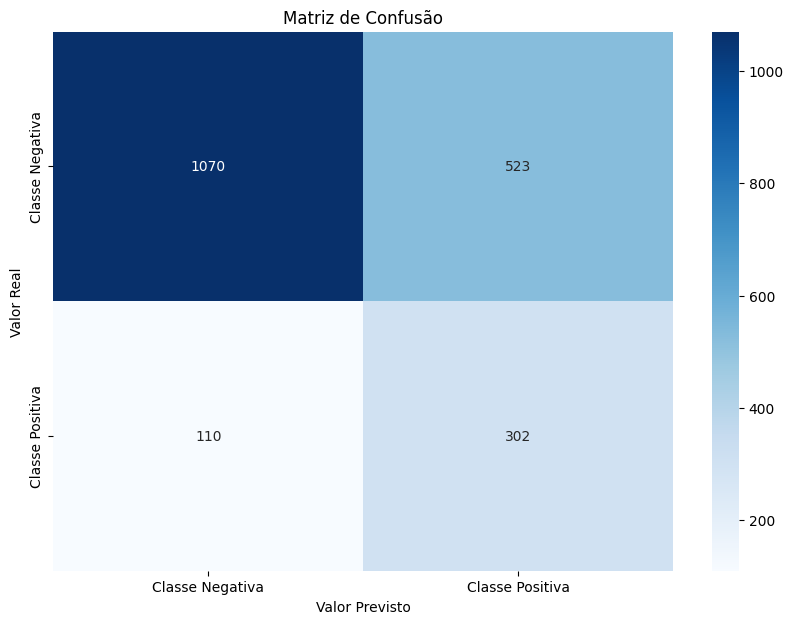

Relatório de Classificação:
               precision    recall  f1-score   support

    Classe 0       0.91      0.67      0.77      1593
    Classe 1       0.37      0.73      0.49       412

    accuracy                           0.68      2005
   macro avg       0.64      0.70      0.63      2005
weighted avg       0.80      0.68      0.71      2005



In [18]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Certifique-se de que X_test e Y_test tenham a forma correta
print(f"Forma de X_test: {X_test.shape}")
print(f"Forma de Y_test: {Y_test.shape}")

# Verifique se X_test não está vazio
if X_test.size == 0:
    raise ValueError("X_test está vazio")

# Realize a predição
previsoes = model.predict(X_test)

# Verifique a forma das previsões
print(f"Forma das previsões: {previsoes.shape}")

# Converta as previsões para binário
previsoes_binarias = [1 if x > 0.5 else 0 for x in previsoes]

# Avaliação da acurácia
acuracia = accuracy_score(Y_test, previsoes_binarias)
print(f"Acurácia no conjunto de teste: {acuracia}")

# Matriz de Confusão
matriz_confusao = confusion_matrix(Y_test, previsoes_binarias)
print("Matriz de Confusão:\n", matriz_confusao)

# Plot da Matriz de Confusão
plt.figure(figsize=(10, 7))
sns.heatmap(matriz_confusao, annot=True, fmt="d", cmap="Blues", xticklabels=["Classe Negativa", "Classe Positiva"], yticklabels=["Classe Negativa", "Classe Positiva"])
plt.title('Matriz de Confusão')
plt.ylabel('Valor Real')
plt.xlabel('Valor Previsto')
plt.show()

# Relatório de Classificação
relatorio_classificacao = classification_report(Y_test, previsoes_binarias, target_names=["Classe 0", "Classe 1"])
print("Relatório de Classificação:\n", relatorio_classificacao)


In [19]:
# Exibindo todas as métricas salvas para cada fold e fase
for fase, metricas_fase in enumerate(metricas_por_fold, 1):
    print(f"Fase {fase}:")
    for fold, (f1, recall, precision) in enumerate(metricas_fase, 1):
        print(f"  Fold {fold}: F1-score = {f1:.4f}, Recall = {recall:.4f}, Precision = {precision:.4f}")

# Se você também deseja calcular e mostrar a média das métricas por fase e a média geral, pode fazer isso:
medias_f1 = []
medias_recall = []
medias_precision = []
print('                                                      ')    
print('                                                      ')
j =0
for metricas_fase in metricas_por_fold:
    print("fase: ", j+1)
    f1s = [f1 for f1, _, _ in metricas_fase]
    recalls = [recall for _, recall, _ in metricas_fase]
    precisions = [precision for _, _, precision in metricas_fase]
    
    media_f1_fase = np.mean(f1s)
    media_recall_fase = np.mean(recalls)
    media_precision_fase = np.mean(precisions)

    medias_f1.append(media_f1_fase)
    medias_recall.append(media_recall_fase)
    medias_precision.append(media_precision_fase)

    print(f"Média F1-score da fase: {media_f1_fase:.4f}")
    print(f"Média Recall da fase: {media_recall_fase:.4f}")
    print(f"Média Precision da fase: {media_precision_fase:.4f}")
    print('                                                      ')    
    print('                                                      ')
    j+=1

print(f"Média final F1-score: {np.mean(medias_f1):.4f}")
print(f"Média final Recall: {np.mean(medias_recall):.4f}")
print(f"Média final Precision: {np.mean(medias_precision):.4f}")


Fase 1:
  Fold 1: F1-score = 0.7152, Recall = 0.7088, Precision = 0.7333
  Fold 2: F1-score = 0.7356, Recall = 0.7316, Precision = 0.7419
  Fold 3: F1-score = 0.7255, Recall = 0.7293, Precision = 0.7233
                                                      
                                                      
fase:  1
Média F1-score da fase: 0.7254
Média Recall da fase: 0.7233
Média Precision da fase: 0.7329
                                                      
                                                      
Média final F1-score: 0.7254
Média final Recall: 0.7233
Média final Precision: 0.7329


In [20]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

def train_model(model, X_train, Y_train, EPOCHS=25):
    # Usando 'val_accuracy' em vez de 'val_acc'
    early_stop = EarlyStopping(monitor='val_accuracy', patience=7, verbose=1,
                               mode='max', restore_best_weights=True)

    reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=5,
                                  verbose=1, mode='max', min_lr=1e-5)

    history = model.fit(X_train,
                        Y_train,
                        validation_split=0.2,
                        batch_size=16,
                        epochs=EPOCHS,
                        callbacks=[reduce_lr, early_stop])
    return history


melor fold = 3
Epoch 1/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 53s 491ms/step - accuracy: 0.7596 - loss: 0.5622 - val_accuracy: 0.5720 - val_loss: 1.0641 - learning_rate: 0.0010
Epoch 2/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8891 - loss: 0.2699 - val_accuracy: 0.7901 - val_loss: 0.4857 - learning_rate: 0.0010
Epoch 3/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.8762 - loss: 0.2821 - val_accuracy: 0.5391 - val_loss: 1.4860 - learning_rate: 0.0010
Epoch 4/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9255 - loss: 0.1743 - val_accuracy: 0.8395 - val_loss: 0.4714 - learning_rate: 0.0010
Epoch 5/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9375 - loss: 0.1716 - val_accuracy: 0.8560 - val_loss: 0.3673 - learning_rate: 0.0010
Epoch 6/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9440 - loss: 0.1409 - val_accuracy: 0.8148 - val_loss: 0.5942 - learning_rate: 0.0010
Epoch 7/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9382 - loss:

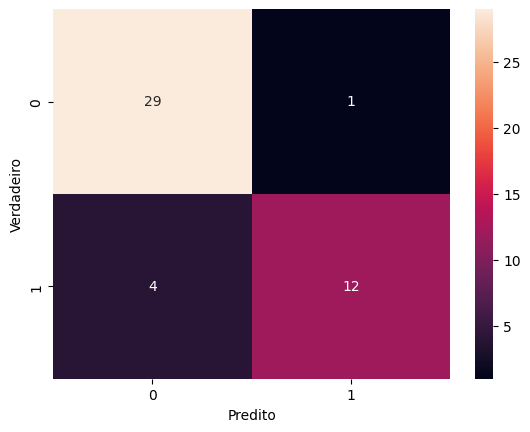

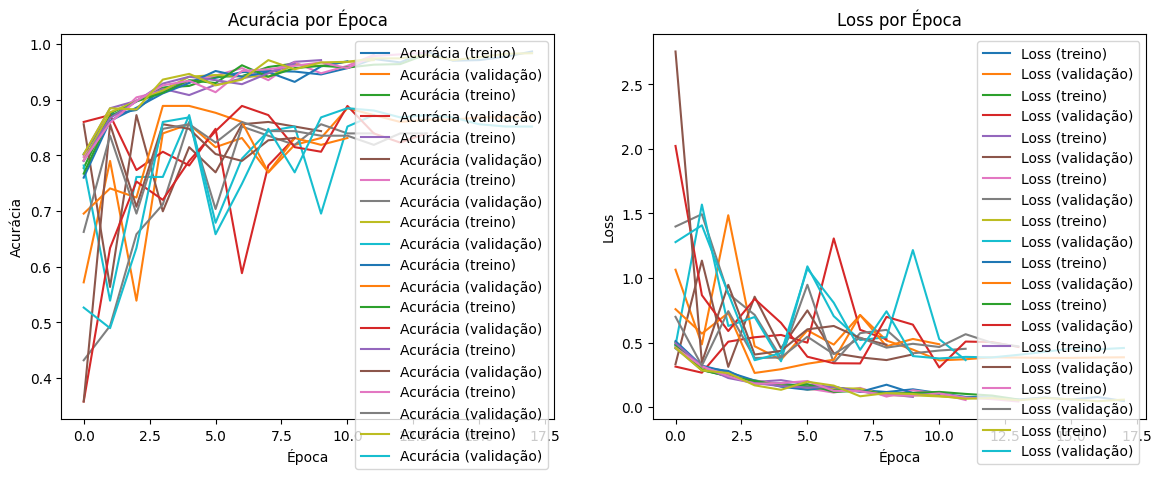

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np  # Importe a biblioteca NumPy

# Listas para armazenar as métricas de cada iteração
accuracies = []
precisions = []
recalls = []
f1_scores = []
historys = []
if(bf==0):
    treinox = x_train_1
    treinoy = y_train_1
    print("melor fold = 1")
elif(bf==1):
    treinox = x_train_2
    treinoy = y_train_2
    print("melor fold = 2")
else:
    treinox = x_train_3
    treinoy = y_train_3
    print("melor fold = 3")

for i in range(10):
    tf.keras.backend.clear_session()
    model = create_InceptionV3()
    historys.append(train_model(model, treinox, treinoy, 30))

    previsoes = model.predict(X_test)
    previsoes_binarias = [1 if x > 0.5 else 0 for x in previsoes]

    # Adiciona a acurácia à lista
    acuracia = accuracy_score(Y_test, previsoes_binarias)
    accuracies.append(acuracia)

    # Calcula e adiciona precisão, recall e f1-score à suas respectivas listas
    relatorio_classificacao = classification_report(Y_test, previsoes_binarias, target_names=["Classe 0", "Classe 1"], output_dict=True)
    # Capturando os valores individuais de precisão, recall e F1-score para a classe '1'
    precisao_classe_1 = relatorio_classificacao['macro avg']['precision']
    recall_classe_1 = relatorio_classificacao['macro avg']['recall']
    f1_score_classe_1 = relatorio_classificacao['macro avg']['f1-score']

    print(f"Precisão Classe 1: {precisao_classe_1}")
    print(f"Recall Classe 1: {recall_classe_1}")
    print(f"F1-Score Classe 1: {f1_score_classe_1}")

    precisions.append(precisao_classe_1)
    recalls.append(recall_classe_1)
    f1_scores.append(f1_score_classe_1)


# Calcula a média de cada métrica
acuracia_media = np.mean(accuracies)
precisao_media = np.mean(precisions)
recall_medio = np.mean(recalls)
f1_score_medio = np.mean(f1_scores)

# Calcula o desvio padrão de cada métrica
acuracia_dp = np.std(accuracies)
precisao_dp = np.std(precisions)
recall_dp = np.std(recalls)
f1_score_dp = np.std(f1_scores)

# Exibe os resultados
print(f"Acurácia média: {acuracia_media} ± {acuracia_dp}")
print(f"Precisão média: {precisao_media} ± {precisao_dp}")
print(f"Recall médio: {recall_medio} ± {recall_dp}")
print(f"F1-Score médio: {f1_score_medio} ± {f1_score_dp}")

# Opção para plotar a matriz de confusão da última iteração
cm = confusion_matrix(Y_test, previsoes_binarias)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.show()

import matplotlib.pyplot as plt

# Configuração do gráfico de Acurácia
plt.figure(figsize=(14, 5))

# Gráfico de Acurácia por Época para cada history
plt.subplot(1, 2, 1)  # 1 linha, 2 colunas, posição 1
for history in historys:
    plt.plot(history.history['accuracy'], label='Acurácia (treino)')
    plt.plot(history.history['val_accuracy'], label='Acurácia (validação)')
plt.title('Acurácia por Época')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()

# Configuração do gráfico de Loss
plt.subplot(1, 2, 2)  # 1 linha, 2 colunas, posição 2
for history in historys:
    plt.plot(history.history['loss'], label='Loss (treino)')
    plt.plot(history.history['val_loss'], label='Loss (validação)')
plt.title('Loss por Época')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [23]:
model.save_weights('/kaggle/working/VGG-16.weights.h5')